<a href="https://colab.research.google.com/github/Manreet10/IoT-Devices---Time-Series-Plots/blob/main/IoT_Devices_Time_Series_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IoT Devices - Time Series Plots**


---

### Goal of the Project:

This project is designed for :

 - The `datetime` module
 - Data Cleaning
 - Grouping and Aggregation
 - Customised `matplotlib` plots
 - Bivariate Bar Plots

---

### Context

The **Internet of things (IoT)** describes the network of physical objects that are embedded with sensors, software, and other technologies to connect and exchange data with other devices and systems over the **Internet**. 
 
IoT devices have been around for quite a while now. They are used to collect data through different kinds of sensors such as **motion sensors**, **heat sensors**, **vibration sensors**, etc.

A lot of people are using smartwatches and fitness watches to track their daily physical activities, calories burnt, average resting heart rates, and sleep cycle so that they lead a fit life. Such wearables are equipped with laser sensors to collect data.

Heat Index (temperature + humidity) is one common data recorded on these IoT readers. The sensor reads hundreds to millions of data per second. There is a huge and versatile application of this data in real-world like agriculture, weather forecasting, soil monitoring and treatment, enterprise maintenance, and so on.

Heat stress index of India:

<img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/heat_index_india.png' width=600>


---

### Problem Statement

Put yourself in the shoes of a quality analyst whose task is to test the efficacy of new IoT devices. You need to create time-series plots for daily temperature variation for the given duration and find any inconsistencies in the temperature readings (if there are any). 

In case the data collected through the device is correct, find the percentages of the yellow, orange, and red zones. 

---

### Dataset Information

This dataset contains the temperature readings from an IoT device installed outside and inside of an anonymous room (labelled as admin room) to test the device. The readings were taken between 11 January 2018 and 10 December 2018. Additionally, it was uninstalled or taken down quite frequently during the entire reading period. 

There are 5 columns and 97,605 rows in the dataset. The columns are as follows:

1. `id` - Unique IDs for each reading.

2. `room_id/id` - Room id in which device was installed (inside and/or outside). In this dataset, only `Room Admin` label is used as a `room_id` for example purpose.

3. `noted_date` - Date and time of reading.

4. `temp` - Temperature readings.

5. `out/in` - Whether the reading was taken from a device installed inside or outside of the room?

Here's the dataset link:

https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/iot-devices/IoT-device.csv

---

### Things To Do

- What is the trend in the variation in daily indoor and outdoor temperatures?

- What is the trend in the variation in monthly median indoor and outdoor temperatures?

- Find out the hottest and coldest month(s).

- Find the maximum and minimum temperatures recorded for each month.

---

## Specific Tasks to Achieve the Main Goal:

In [ ]:
# Import the required modules and load the dataset.
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Dataset link = 'https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/iot-devices/IoT-device.csv'
link = "https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/iot-devices/IoT-device.csv"
df = pd.read_csv(link)
df.head()

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In


In [ ]:
# Get the information of DataFrame using the 'info()' function.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          97606 non-null  object
 1   room_id/id  97606 non-null  object
 2   noted_date  97606 non-null  object
 3   temp        97606 non-null  int64 
 4   out/in      97606 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.7+ MB


---

#### 2. Missing Values Check



In [ ]:
# The null values in DataFrame are checked using the 'isnull()' function.
df.isnull().sum()

id            0
room_id/id    0
noted_date    0
temp          0
out/in        0
dtype: int64

---

#### 3. Drop Unnecessary Columns




In [ ]:
# Drop the unnecessary columns from the DataFrame. 
df = df.drop(['id','room_id/id'],axis=1)

---

#### 4. Get `datetime` Objects

Convert the values contained in the `noted_date` column into the `datetime` objects.

In [ ]:
# The values contained in the 'noted_date' column are coverted into the 'datetime' objects.
df['noted_date'] = pd.to_datetime(df['noted_date'])

In [ ]:
# Verify whether the conversion is successful or not.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   noted_date  97606 non-null  datetime64[ns]
 1   temp        97606 non-null  int64         
 2   out/in      97606 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.2+ MB


---

#### 5. Sort The DataFrame

Sort the DataFrame in the chronological order.

In [ ]:
# Sort the DataFrame in the increasing order of dates and time.
df.sort_values('noted_date',ascending=True)

,noted_date,temp,out/in
16218,2018-01-11 00:06:00,32,In
16217,2018-01-11 00:07:00,40,Out
16216,2018-01-11 00:09:00,39,Out
16215,2018-01-11 00:13:00,40,Out
16214,2018-01-11 00:23:00,40,Out
...,...,...,...
50668,2018-12-10 23:41:00,44,Out
50667,2018-12-10 23:43:00,44,Out
50666,2018-12-10 23:49:00,44,Out
50665,2018-12-10 23:51:00,45,Out


---

#### 6. Add More Features

Get the year, month, day, day name, hours, and minutes values from the `datetime` values and create new columns for the same.

In [ ]:
# Create new columns for year, month, day, day name, hours and minutes values and add to the DataFrame.
year_col = df['noted_date'].dt.year
month_col = df['noted_date'].dt.month
day_col = df['noted_date'].dt.day
day_name_col = df['noted_date'].dt.day_name()
minutes_col = df['noted_date'].dt.minute
hour_col = df['noted_date'].dt.hour
#adding:
df['YEAR'] = year_col
df['MONTH'] = month_col
df['DAY'] = day_col
df['DAY_NAME'] = day_name_col
df['MINUTES'] = minutes_col
df['HOUR'] = hour_col

In [ ]:
# Display the first five rows of the DataFrame.
df.head()

,noted_date,temp,out/in,YEAR,MONTH,DAY,DAY_NAME,MINUTES,HOUR
0,2018-08-12 09:30:00,29,In,2018,8,12,Sunday,30,9
1,2018-08-12 09:30:00,29,In,2018,8,12,Sunday,30,9
2,2018-08-12 09:29:00,41,Out,2018,8,12,Sunday,29,9
3,2018-08-12 09:29:00,41,Out,2018,8,12,Sunday,29,9
4,2018-08-12 09:29:00,31,In,2018,8,12,Sunday,29,9


---

#### 7. Line Plots and Box Plots

Create line plots and box plots for the temperature recorded in the indoor and outdoor settings.

In [ ]:
# Create a DataFrame for the indoor temperature records using 'df[df['out/in'] == 'In']'.
indoor_temp = df[df['out/in'] == 'In']
print(indoor_temp.head())

           noted_date  temp out/in  YEAR  MONTH  DAY DAY_NAME  MINUTES  HOUR
0 2018-08-12 09:30:00    29     In  2018      8   12   Sunday       30     9
1 2018-08-12 09:30:00    29     In  2018      8   12   Sunday       30     9
4 2018-08-12 09:29:00    31     In  2018      8   12   Sunday       29     9
5 2018-08-12 09:29:00    31     In  2018      8   12   Sunday       29     9
6 2018-08-12 09:28:00    29     In  2018      8   12   Sunday       28     9


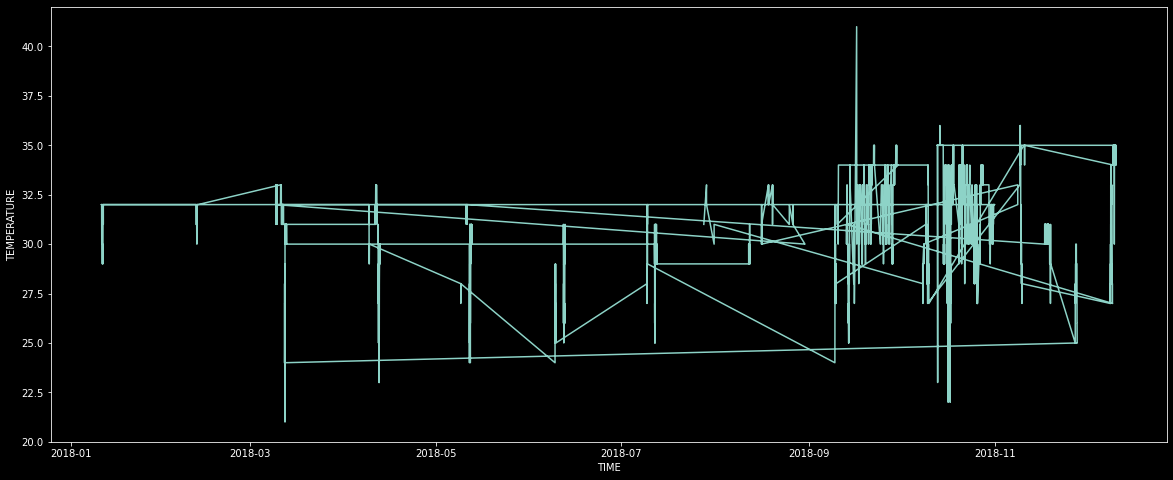

In [ ]:
# Create a time series line plot for the indoor temperature records.
import matplotlib.pyplot as plt


plt.style.use('dark_background')
plt.figure(figsize=(20,8))
plt.plot(indoor_temp['noted_date'],indoor_temp['temp'])
plt.xlabel('TIME')
plt.ylabel('TEMPERATURE')

plt.show()

# pass the 'noted_date' and 'temp' columns of the indoor temperature Dataframe inside the 'plot()' function. 


In [ ]:
# Create a DataFrame for the outdoor temperature records.
outdoor_temp = df[df['out/in'] == 'Out']

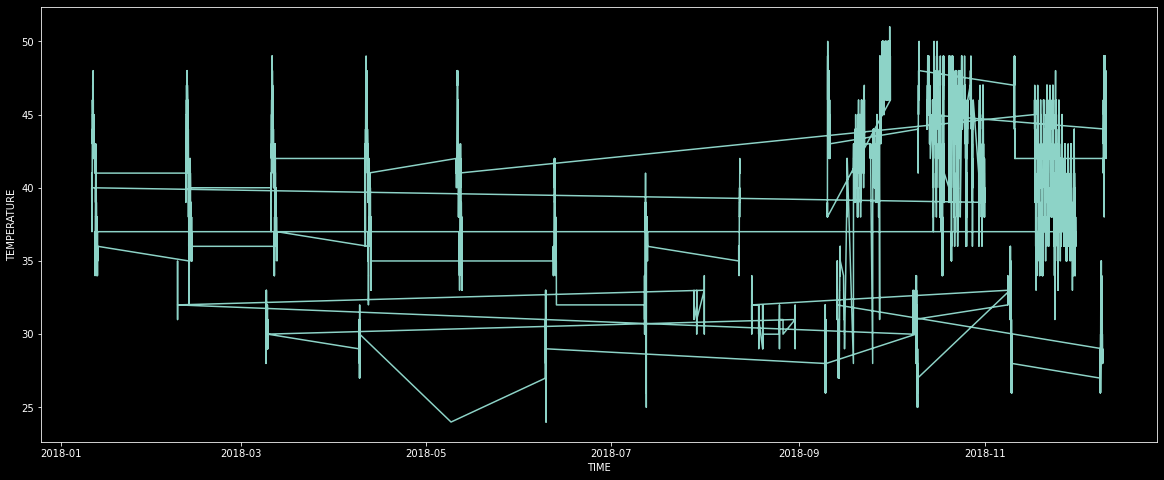

In [ ]:
# Create a time series line plot for the outdoor temperature records.
plt.style.use('dark_background')
plt.figure(figsize=(20,8))
plt.plot(outdoor_temp['noted_date'],outdoor_temp['temp'])

plt.xlabel('TIME')
plt.ylabel('TEMPERATURE')

plt.show()


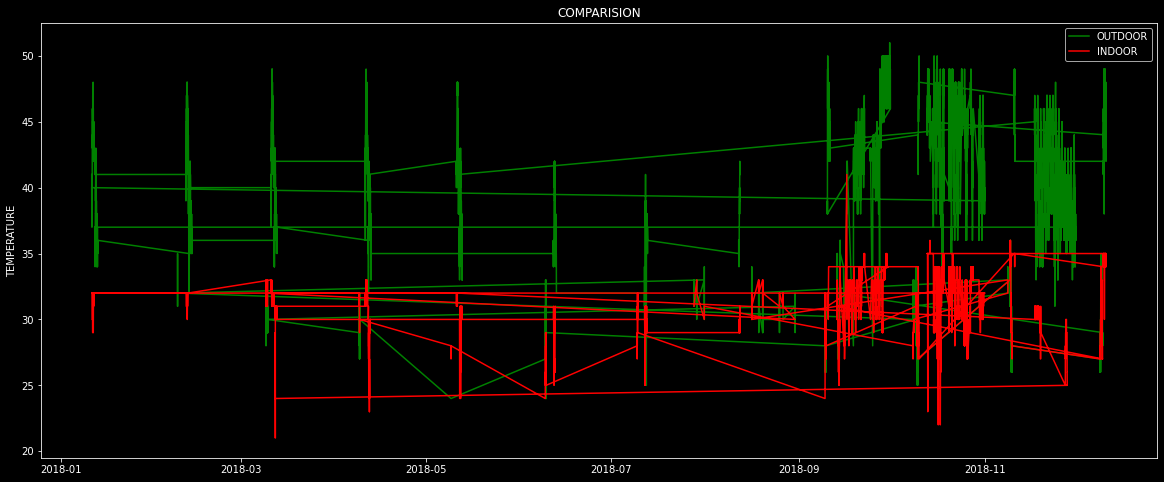

In [ ]:
# Compare the time series line plots for both the indoor and outdoor temperature records.
plt.figure(figsize=(20,8))
plt.title('COMPARISION')

plt.plot(outdoor_temp['noted_date'],outdoor_temp['temp'],color='green',label = 'OUTDOOR')

plt.plot(indoor_temp['noted_date'],indoor_temp['temp'],color='red',label = 'INDOOR')

plt.ylabel('TEMPERATURE')
plt.legend()
plt.show()

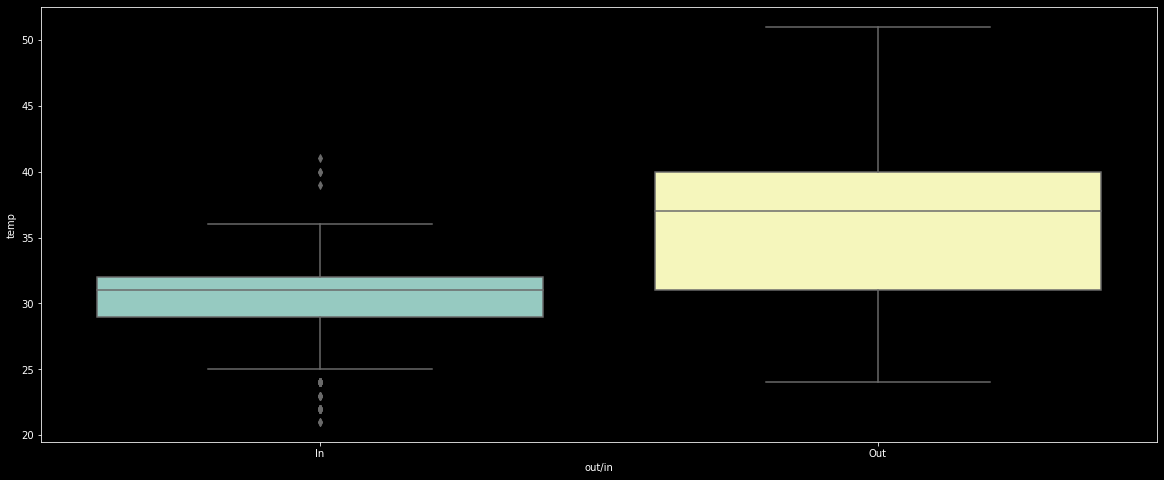

In [ ]:
# Create a box plot to represent the distribution of indoor and outdoor temperatures for the whole year.
import seaborn as sns
plt.figure(figsize=(20,8))
sns.boxplot(x='out/in',y='temp',data = df)
plt.show()
# pass the 'out/in' and 'temp' columns inside the 'x' and 'y' attributes of the 'boxplot()' function.


---

#### 8. Grouping, Aggregation, and Bar Plots

Group the data by the indoor and outdoor temperatures. Also, get monthly mean, standard deviation, median, minimum and maximum values for both the indoor and outdoor groups.


In [ ]:
# Get the maximum and minimum temperatures for each day in each month.
df.groupby(by=['MONTH', 'DAY']).agg(func={'temp' : ['max', 'min']})

temp    
           max min
MONTH DAY         
1     11    48  29
      12    43  34
2     8     35  31
      11    48  30
      12    42  32
...        ...  ..
11    28    43  25
      29    43  33
      30    44  34
12    9     35  26
      10    49  30

[86 rows x 2 columns]

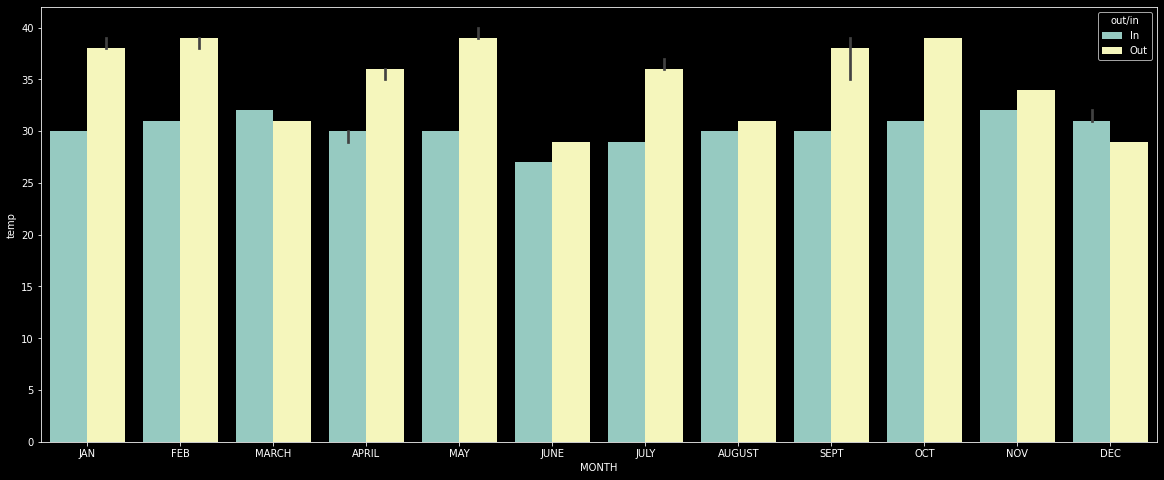

In [ ]:
# Create a bar plot for the monthly median indoor & outdoor temperatures in a single bar chart.
# Store the month names in a list i.e the labels of the x-axis
month_name = ['JAN','FEB','MARCH','APRIL','MAY','JUNE','JULY','AUGUST','SEPT','OCT','NOV','DEC']

# Import 'median' from the 'numpy' module  
from numpy import median
# Pass 'month', 'temp' and 'out/in' columns inside the 'x', 'y' and 'hue' parameters of the 'baplot()' function
# Set the 'estimator' attribute with 'median' value
plt.figure(figsize=(20,8))
sns.barplot(x='MONTH',y = 'temp' ,hue='out/in',data = df,estimator = median)
plt.xticks(ticks = np.arange(12),labels = month_name)
plt.show()
# pass the list holding the name of months inside the 'xticks()' function
# set 'ticks=np.arrange(12)'


---

In [ ]:
# Function to label each temperature value on a given day and time with the heat indices as advised in the data-description.
def heat_index(temp_series):
  heat_index_list = []
  for temp in temp_series:
    if temp <= 32:
      heat_index_list.append('Green')
    elif (temp > 32) and (temp <= 41):
      heat_index_list.append('Yellow')
    elif (temp > 41) and (temp <= 54):
      heat_index_list.append('Orange')
    else:
      heat_index_list.append('Red')
  return pd.Series(data=heat_index_list, index=temp_series.index)

heat_index(df['temp'])

0         Green
1         Green
2        Yellow
3        Yellow
4         Green
          ...  
97601     Green
97602     Green
97603     Green
97604     Green
97605     Green
Length: 97606, dtype: object

In [ ]:
# Add the 'heat_index' column in the DataFrame containing the heat indices corresponding to the temperature values on a given day and time.
df['heat_index'] = heat_index(df['temp'])
df.head()

,noted_date,temp,out/in,YEAR,MONTH,DAY,DAY_NAME,MINUTES,HOUR,heat_index
0,2018-08-12 09:30:00,29,In,2018,8,12,Sunday,30,9,Green
1,2018-08-12 09:30:00,29,In,2018,8,12,Sunday,30,9,Green
2,2018-08-12 09:29:00,41,Out,2018,8,12,Sunday,29,9,Yellow
3,2018-08-12 09:29:00,41,Out,2018,8,12,Sunday,29,9,Yellow
4,2018-08-12 09:29:00,31,In,2018,8,12,Sunday,29,9,Green


In [ ]:
# Counts of the heat zones.
group_heat_index = df.groupby(by=['heat_index', 'out/in'])
heat_index_agg = group_heat_index.agg(func={'temp' : ['max', 'count']})
heat_index_agg

temp       
                   max  count
heat_index out/in            
Green      In       32  16812
           Out      32  24845
Orange     Out      51  12407
Yellow     In       41   3533
           Out      41  40009

In [ ]:
heat_index_agg.columns

MultiIndex([('temp',   'max'),
            ('temp', 'count')],
           )

In [ ]:
# Percentage distribution of the heat zones.
heat_index_agg[('temp', 'percent')] = heat_index_agg[('temp', 'count')] * 100 / df.shape[0]
heat_index_agg

temp                  
                   max  count    percent
heat_index out/in                       
Green      In       32  16812  17.224351
           Out      32  24845  25.454378
Orange     Out      51  12407  12.711309
Yellow     In       41   3533   3.619655
           Out      41  40009  40.990308

Hence, we can conclude that, Yellow zone has the most number of recordings, that is, nearly 41%.

---

---